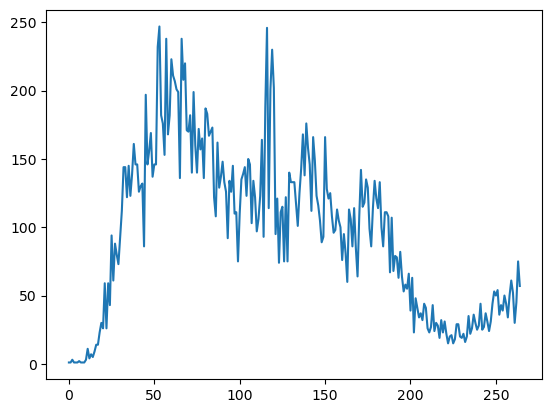

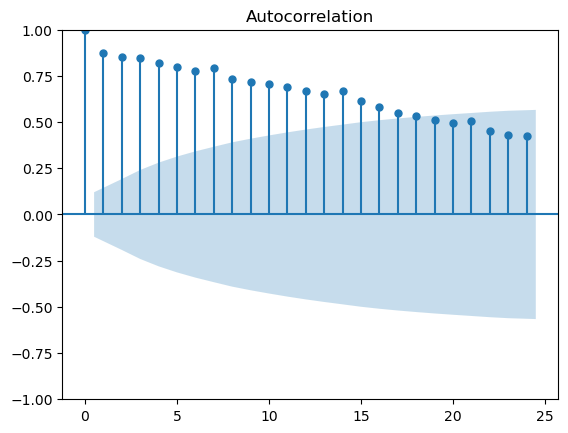

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


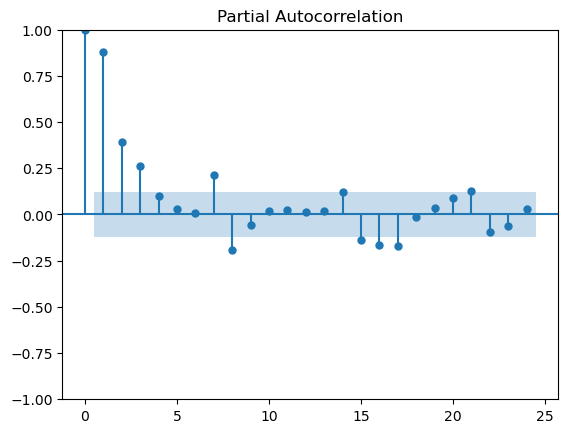

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\澎湖縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Penghu.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Penghu_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Penghu_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\澎湖縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        3
3        1
4        1
..     ...
261     30
262     45
263     75
264     57
265     56

[266 rows x 1 columns]
266


## GRU架構

### Model1

### Model2

### Model3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 64)             12864     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
24/24 [==============================] - 5s 37ms/step - loss: 0.0670 - mse: 0.0670 - val_loss: 0.1110 - val_mse: 0.1110
Epoch 2/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0665 - mse: 0.0665 - val_loss: 0.1088 - val_mse: 0.1088
Epoch 3/5000
24/24 [==============================

24/24 [==============================] - 0s 7ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0661 - val_mse: 0.0661
Epoch 57/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 58/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0658 - val_mse: 0.0658
Epoch 59/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0655 - val_mse: 0.0655
Epoch 60/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0653 - val_mse: 0.0653
Epoch 61/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 62/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0649 - val_mse: 0.0649
Epoch 63/5000
24/24 [==============================] - 0s 13ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 118/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0563 - mse: 0.0563 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 119/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0563 - mse: 0.0563 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 120/5000
24/24 [==============================] - 0s 18ms/step - loss: 0.0563 - mse: 0.0563 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 121/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0563 - mse: 0.0563 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 122/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 123/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 124/5000
24/24 [==============================] - 0s 14ms/step - los

24/24 [==============================] - 0s 10ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 179/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 180/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 181/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 182/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 183/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 184/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0575 - val_mse: 0.0575
Epoch 185/5000
24/24 [==============================] - 0s 10ms/step - l

24/24 [==============================] - 0s 8ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0552 - val_mse: 0.0552
Epoch 240/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0521 - mse: 0.0521 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 241/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0521 - mse: 0.0521 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 242/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0520 - mse: 0.0520 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 243/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0520 - mse: 0.0520 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 244/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 245/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 246/5000
24/24 [==============================] - 0s 10ms/step - los

Epoch 300/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 301/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 302/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 304/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 305/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 306/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 307/5000
24/24 [==============================] - 0s 

Epoch 361/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0472 - val_mse: 0.0472
Epoch 362/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0471 - val_mse: 0.0471
Epoch 363/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0471 - val_mse: 0.0471
Epoch 364/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 366/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 367/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 368/5000
24/24 [==============================] - 0

Epoch 422/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 423/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 424/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 425/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 426/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 427/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 428/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 429/5000
24/24 [==============================] - 

Epoch 483/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 484/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 485/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 486/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 487/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 488/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 489/5000
24/24 [==============================] - 0s 19ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 490/5000
24/24 [==============================] - 1

Epoch 544/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 545/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 546/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 547/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 548/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 549/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 550/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 551/5000
24/24 [==============================] -

Epoch 605/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 606/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 607/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 608/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 609/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 610/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 611/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 612/5000
24/24 [==============================] -

Epoch 666/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 667/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 668/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 669/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 670/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 671/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 672/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 673/5000
24/24 [==============================] -

Epoch 727/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 728/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 729/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 730/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 731/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 732/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 733/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 734/5000
24/24 [==============================] - 0

Epoch 788/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 789/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 790/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 791/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 792/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 793/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 794/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 795/5000
24/24 [==============================] - 0s 1

Epoch 849/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 850/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 851/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 852/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 853/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 854/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 855/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 856/5000
24/24 [==============================] - 0

Epoch 910/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 911/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 912/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 913/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 914/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 915/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 916/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 917/5000
24/24 [==============================] - 0s 8m

Epoch 971/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 972/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 973/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 974/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 975/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 976/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 977/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 978/5000
24/24 [==============================] - 0s 8m

Epoch 1032/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1033/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1034/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1035/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1036/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1037/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1038/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1039/5000
24/24 [==============================

24/24 [==============================] - 0s 7ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1093/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1094/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 1095/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1096/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 1097/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 1098/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 1099/5000
24/24 [==============================] - 0s 8ms/step

Epoch 1153/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 1154/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 1155/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 1156/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 1157/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 1158/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 1159/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 1160/5000
24/24 [==============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1214/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1215/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1216/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1217/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1218/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1219/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1220/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1274/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1275/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1276/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1277/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1278/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1279/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1280/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1281/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1335/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1336/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1337/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1338/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1339/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1340/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1341/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1395/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1396/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1397/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1398/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1399/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1400/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1401/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1402/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1456/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1457/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1458/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1459/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1460/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1461/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1462/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 1516/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1517/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1518/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1519/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1520/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1521/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1522/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1523/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1577/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1578/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1579/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1580/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1581/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1582/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1583/5000
24/24 [==============================] - 0s 9ms/step -

Epoch 1637/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1638/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1639/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1640/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1641/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1642/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1643/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1644/5000
24/24 [=============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1698/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1699/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1700/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1701/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1702/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1703/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1704/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1758/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1759/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1760/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1761/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1762/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1763/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1764/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1765/5000
24/24 [==============================] 

24/24 [==============================] - 0s 11ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1819/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1820/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1821/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1822/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1823/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1824/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1825/5000
24/24 [==============================] - 0s 9ms/step 

Epoch 1879/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1880/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1881/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1882/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1883/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1884/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1885/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1886/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1940/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1941/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1942/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1943/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1944/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1945/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1946/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2000/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2001/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2002/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2003/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2004/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2005/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2006/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2007/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2061/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2062/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2063/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2064/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2065/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2066/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2067/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 2121/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2122/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2123/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2124/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2125/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2126/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2127/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2128/5000
24/24 [==============================

24/24 [==============================] - 0s 9ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2182/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2183/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2184/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2185/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2186/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2187/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2188/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 2242/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2244/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2245/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2246/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2247/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2248/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2249/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2304/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2305/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2306/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2307/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2308/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2309/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 2363/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2364/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2366/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2367/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2368/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2369/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2370/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2424/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2425/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2426/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2427/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2428/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2429/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2430/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 2484/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2485/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2486/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2487/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2488/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2489/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2490/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2491/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2545/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2546/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2547/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2548/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2549/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2550/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2551/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2605/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2606/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2607/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2608/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2609/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2610/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2611/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2612/5000
24/24 [==============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2666/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2667/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2668/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2669/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2670/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2671/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2672/5000
24/24 [==============================] - 0s 10ms/step 

Epoch 2726/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2727/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2728/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2729/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2730/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2731/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2732/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2733/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2787/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2788/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2789/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2790/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2791/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2792/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2793/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2847/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2848/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2849/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2850/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2851/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2852/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2853/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2854/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2908/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2909/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2910/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2911/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2912/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2913/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2914/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2968/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2969/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2970/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2971/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2972/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2973/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2974/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2975/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3029/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3030/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3031/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3032/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3033/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3034/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3035/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3089/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3090/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3091/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3092/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3093/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3094/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3095/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3096/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3150/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3151/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3152/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3153/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3154/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3155/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3156/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3210/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3211/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3212/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3213/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3214/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3215/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3216/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3217/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3271/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3272/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3273/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3274/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3275/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3276/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3277/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 3331/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3332/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3333/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3334/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3335/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3336/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3337/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3338/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3392/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3393/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3394/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3395/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3396/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3397/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3398/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 3452/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3453/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3454/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3455/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3456/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3457/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3458/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3459/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3513/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3514/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3515/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3516/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3517/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3518/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3519/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3573/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3574/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3575/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3576/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3577/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3578/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3579/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3580/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3634/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3635/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3636/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3637/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3638/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3639/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3640/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3694/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3695/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3696/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3697/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3698/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3699/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3700/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3701/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3755/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3756/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3757/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3758/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3759/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3760/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3761/5000
24/24 [==============================] - 0s 16ms/step -

Epoch 3815/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3816/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3817/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3818/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3819/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3820/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3821/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3822/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3876/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3877/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3878/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3879/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3880/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3881/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3882/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3936/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3937/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3938/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3939/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3940/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3941/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3942/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3943/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3997/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3998/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3999/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4000/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4001/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4002/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4003/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4057/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4058/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4059/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4060/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4061/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4062/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4063/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4064/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4118/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4119/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4120/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4121/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4122/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4123/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4124/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4178/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4179/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4180/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4181/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4182/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4183/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4184/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4185/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4239/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4240/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4241/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4242/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4244/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4245/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4299/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4300/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4301/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4302/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4303/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4304/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4305/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4306/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4360/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4361/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4362/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4363/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4364/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4366/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4420/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4421/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4422/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4423/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4424/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4425/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4426/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4427/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4481/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4482/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4483/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4484/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4485/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4486/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4487/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4541/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4542/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4543/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4544/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4545/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4546/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4547/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4548/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4602/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4603/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4604/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4605/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4607/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4608/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4662/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4663/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4664/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4665/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4666/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4667/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4668/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4669/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4723/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4724/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4725/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4726/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4727/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4728/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4729/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 4783/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4784/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4785/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4786/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4787/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4788/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4789/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4790/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4844/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4845/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4846/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4847/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4848/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4849/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4850/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 4904/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4905/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4906/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4907/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4908/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4909/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4910/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4911/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4965/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4966/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4967/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4968/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4969/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4970/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4971/5000
24/24 [==============================] - 0s 10ms/step -

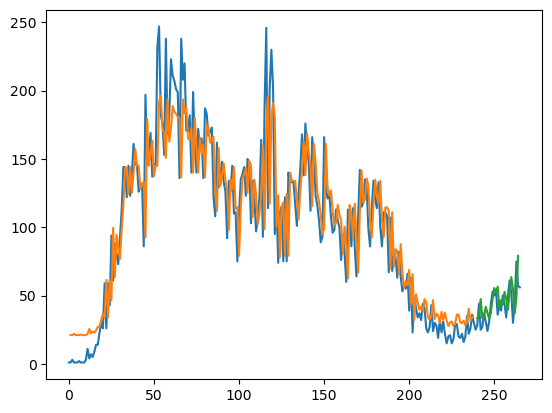

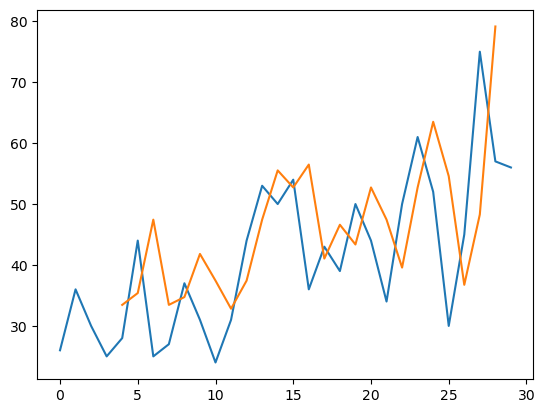

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(1, look_back)),
    GRU(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="penghu_gru_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('penghu_gru_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('penghu_gru_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("penghu_gru_5000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 64)             12864     
                                                                 
 dense_1 (Dense)             (None, 1, 4)              260       
                                                                 
 gru_3 (GRU)                 (None, 64)                13440     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26,629
Trainable params: 26,629
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
24/24 [==============================] - 6s 53ms/step - loss: 0.0730 - mse: 0.0730 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 2/5000
24/24 [=============================

24/24 [==============================] - 0s 14ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 56/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 57/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 58/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 59/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 60/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 61/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 62/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0599

24/24 [==============================] - 0s 11ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 117/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 118/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 119/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 120/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 121/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 122/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 123/5000
24/24 [==============================] - 0s 8ms/step - loss

24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 178/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 179/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 180/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 181/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 182/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 183/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 184/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 239/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 240/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 241/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 242/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 243/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 244/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 245/5000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 300/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 301/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 302/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 304/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 305/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 306/5000
24/24 [==============================] - 0s 9ms/step - loss:

24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 361/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 362/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 363/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 364/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 366/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 367/5000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 11ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 422/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 423/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 424/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 425/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 426/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 427/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 428/5000
24/24 [==============================] - 0s 19ms/step - loss:

24/24 [==============================] - 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 483/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 484/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 485/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 486/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 487/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 488/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 489/5000
24/24 [==============================] - 0s 8ms/step - loss:

24/24 [==============================] - 0s 10ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 544/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 545/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 546/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 547/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 548/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 549/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 550/5000
24/24 [==============================] - 0s 10ms/step - lo

24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 605/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 607/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 608/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 609/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 610/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 611/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 666/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 667/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 668/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 669/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 670/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 671/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 672/5000
24/24 [==============================] - 0s 9ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 727/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 728/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 729/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 730/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 731/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 732/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 733/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 788/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 789/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 790/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 791/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 792/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 793/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 794/5000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 849/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 850/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 851/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 852/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 853/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 854/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 855/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 910/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 911/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 912/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 913/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 914/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 915/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 916/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 971/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 972/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 973/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 974/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 975/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 976/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 977/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

Epoch 1031/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 1032/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 1033/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 1034/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 1035/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 1036/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 1037/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 1038/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 1092/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 1093/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 1094/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 1095/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 1096/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 1097/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 1098/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 1152/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 1153/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 1154/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 1155/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 1156/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 1157/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 1158/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 1159/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 1213/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1214/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 1215/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 1216/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 1217/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1218/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 1219/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 1273/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 1274/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 1275/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 1276/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 1277/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 1278/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 1279/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1280/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 1334/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 1335/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 1336/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 1337/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 1338/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 1339/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 1340/5000
24/24 [==============================] - 0s 9ms/step -

Epoch 1394/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 1395/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 1396/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 1397/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1398/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 1399/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 1400/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 1401/5000
24/24 [==============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1455/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 1456/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 1457/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 1458/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 1459/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1460/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 1461/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1515/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 1516/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0593 - val_mse: 0.0593
Epoch 1517/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0596 - val_mse: 0.0596
Epoch 1518/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0593 - val_mse: 0.0593
Epoch 1519/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 1520/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 1521/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0565 - mse: 0.0565 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 1522/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0559 - mse: 0.0559 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 1576/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0559 - mse: 0.0559 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 1577/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 1578/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 1579/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 1580/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 1581/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 1582/5000
24/24 [==============================] - 0s 9ms/step -

Epoch 1636/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 1637/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0575 - val_mse: 0.0575
Epoch 1638/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 1639/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 1640/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 1641/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0574 - val_mse: 0.0574
Epoch 1642/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0580 - val_mse: 0.0580
Epoch 1643/5000
24/24 [==============================]

24/24 [==============================] - 0s 15ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 1697/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 1698/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 1699/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 1700/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0564 - val_mse: 0.0564
Epoch 1701/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 1702/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 1703/5000
24/24 [==============================] - 0s 17ms/s

24/24 [==============================] - 0s 8ms/step - loss: 0.0520 - mse: 0.0520 - val_loss: 0.0545 - val_mse: 0.0545
Epoch 1757/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0520 - mse: 0.0520 - val_loss: 0.0542 - val_mse: 0.0542
Epoch 1758/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0520 - mse: 0.0520 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 1759/5000
24/24 [==============================] - 0s 19ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0542 - val_mse: 0.0542
Epoch 1760/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 1761/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0518 - mse: 0.0518 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 1762/5000
24/24 [==============================] - 0s 17ms/step - loss: 0.0518 - mse: 0.0518 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 1763/5000
24/24 [==============================] - 0s 9ms/st

24/24 [==============================] - 0s 9ms/step - loss: 0.0498 - mse: 0.0498 - val_loss: 0.0524 - val_mse: 0.0524
Epoch 1817/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0498 - mse: 0.0498 - val_loss: 0.0522 - val_mse: 0.0522
Epoch 1818/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0524 - val_mse: 0.0524
Epoch 1819/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 1820/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0523 - val_mse: 0.0523
Epoch 1821/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 1822/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0523 - val_mse: 0.0523
Epoch 1823/5000
24/24 [==============================] - 0s 9ms/step -

24/24 [==============================] - 0s 15ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 1877/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 1878/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 1879/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 1880/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 1881/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 1882/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0488 - val_mse: 0.0488
Epoch 1883/5000
24/24 [==============================] - 0s 15ms/ste

24/24 [==============================] - 0s 11ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 1937/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 1938/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 1939/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 1940/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 1941/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 1942/5000
24/24 [==============================] - 0s 18ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 1943/5000
24/24 [==============================] - 0s 8ms/st

24/24 [==============================] - 0s 17ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 1997/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 1998/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 1999/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 2000/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 2001/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 2002/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0390 - val_mse: 0.0390
Epoch 2003/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 10ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 2057/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 2058/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 2059/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 2060/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 2061/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 2062/5000
24/24 [==============================] - 0s 19ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 2063/5000
24/24 [==============================] - 0s 18ms/s

24/24 [==============================] - 0s 15ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 2117/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 2118/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 2119/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2120/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2121/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 2122/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 2123/5000
24/24 [==============================] - 0s 15ms/s

24/24 [==============================] - 0s 18ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 2177/5000
24/24 [==============================] - 0s 21ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 2178/5000
24/24 [==============================] - 0s 20ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 2179/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 2180/5000
24/24 [==============================] - 0s 17ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2181/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 2182/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 2183/5000
24/24 [==============================] - 0s 15ms

24/24 [==============================] - 0s 9ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 2237/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 2238/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 2239/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 2240/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 2241/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 2242/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 2243/5000
24/24 [==============================] - 0s 9ms/st

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2297/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2298/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 2299/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 2300/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 2301/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 2302/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 2303/5000
24/24 [==============================] - 0s 9ms/st

24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2357/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2358/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2359/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2360/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2361/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2362/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2363/5000
24/24 [==============================] - 0s 12ms/ste

24/24 [==============================] - 0s 14ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2417/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2418/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2419/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2420/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2421/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2422/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2423/5000
24/24 [==============================] - 0s 9ms/st

24/24 [==============================] - 0s 15ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2477/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2478/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2479/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2480/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2481/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2482/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2483/5000
24/24 [==============================] - 0s 15ms/ste

24/24 [==============================] - 0s 10ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2537/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2538/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2539/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2540/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2541/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2542/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2543/5000
24/24 [==============================] - 0s 8ms/step

24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2597/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2598/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2599/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2600/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2601/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2602/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2603/5000
24/24 [==============================] - 0s 11ms/step 

24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2657/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2658/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2659/5000
24/24 [==============================] - 0s 17ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2660/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2661/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2662/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2663/5000
24/24 [==============================] - 0s 9ms/step

24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2717/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 2718/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2719/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2720/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 2721/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2722/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2723/5000
24/24 [==============================] - 0s 9ms/step - 

24/24 [==============================] - 0s 10ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 2777/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2778/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2779/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2780/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2781/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2782/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2783/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 2837/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 2838/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2839/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2840/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2841/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2842/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2843/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2844/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 2898/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2899/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2900/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2901/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 2902/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2903/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 2904/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3415/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3416/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3417/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3418/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3419/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3420/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3421/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3422/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3476/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3477/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3478/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3479/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3480/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3481/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3482/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 3536/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3537/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3538/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3539/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3540/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3541/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3542/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3543/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3597/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3598/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3599/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3600/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3601/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3602/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3603/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3657/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3658/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3659/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3660/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3661/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3662/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3663/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3664/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4173/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4174/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4175/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4176/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4177/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4178/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4179/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4233/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4234/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4235/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4236/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4237/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4238/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4239/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4240/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4294/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4295/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4296/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4297/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4298/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4299/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4300/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4354/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4355/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4356/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4357/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4358/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4359/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4360/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4361/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4415/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4416/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4417/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4418/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4419/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4420/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4421/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4475/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4476/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4477/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4478/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4479/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4480/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4481/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4482/5000
24/24 [==============================]

24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4536/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4537/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4538/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4539/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4540/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4541/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4542/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4596/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4597/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4598/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4599/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4600/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4601/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4602/5000
24/24 [==============================] - 0s 18ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4603/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4657/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4658/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4659/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4660/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4661/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4662/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4663/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4717/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4718/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4719/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4720/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4721/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4722/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4723/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4724/5000
24/24 [============================

24/24 [==============================] - 0s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4778/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4779/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4780/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4781/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4782/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4783/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4784/5000
24/24 [==============================] - 0s 8ms/step 

Epoch 4838/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4839/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4840/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4841/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4842/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4843/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4844/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4845/5000
24/24 [==============================]

24/24 [==============================] - 0s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4899/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4900/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4901/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4902/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4903/5000
24/24 [==============================] - 0s 20ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4904/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4905/5000
24/24 [==============================] - 0s 8ms/step 

Epoch 4959/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4960/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4961/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4962/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4963/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4964/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4965/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4966/5000
24/24 [==============================]

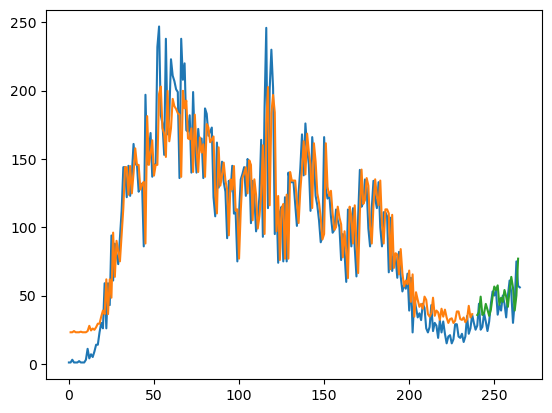

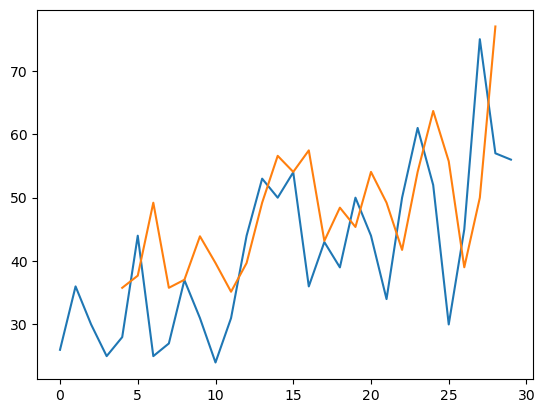

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='relu'),
    GRU(64, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="penghu_gru_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('penghu_gru_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('penghu_gru_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("penghu_gru_5000_predict&real_4.png")
plt.show()